# Results of different f values

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
results = pd.read_csv('./f_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','f','num_agents'], as_index=False).mean()
results.head()

,planner,f,num_agents,num_robots,d,active_time,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,1.1,200,5.0,5.0,1551.939609,1551.939609,0.709559,130430.907010,200.0
1,IterativeAssignmentPlanner,1.2,200,5.0,5.0,964.071445,964.071445,0.582133,76656.548872,200.0
2,IterativeAssignmentPlanner,1.3,200,5.0,5.0,731.415462,731.415462,0.621971,56521.152183,200.0
3,IterativeAssignmentPlanner,1.4,200,5.0,5.0,593.538810,593.538810,0.617540,45803.978075,200.0
4,IterativeAssignmentPlanner,1.5,200,5.0,5.0,506.707575,506.707575,0.725215,38956.520981,200.0


In [8]:
num_agents = 200

results = results.loc[results['num_agents']==num_agents]

planners_names = ['StaticLineLackPlanner',
                  'Practical100StaticLineLackPlanner',
                  'IterativeAssignmentPlanner',
                  'KmeansAssignmentPlanner']
planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Experiments

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1

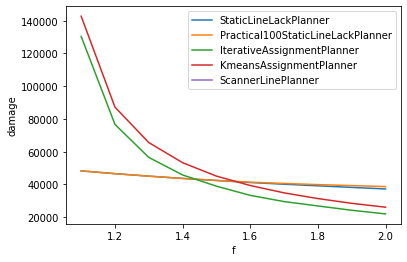

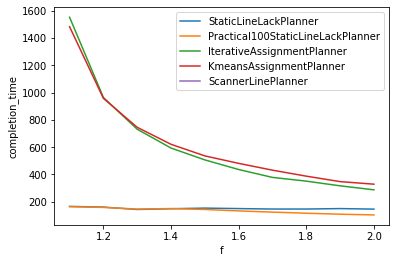

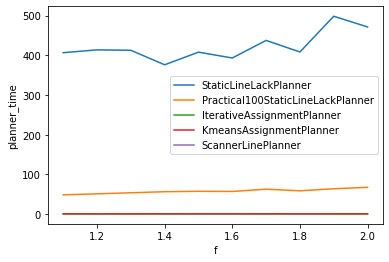

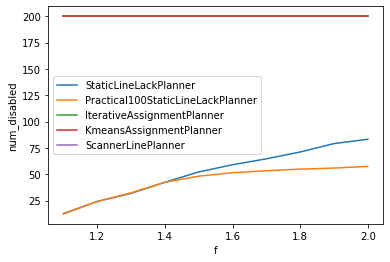

In [9]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['f' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    plt.legend(planners_names)
    # plt.savefig(f'./results/{x}-{y}.png')
    plt.show()